In [1]:
!pwd

/Users/carly/CODE/model2.0/storeresults


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!pwd

/Users/carly/CODE/model2.0/storeresults


In [4]:
pathname = str('/Users/carly/CODE/model2.0/initials/')
modelpath = str('/Users/carly/CODE/model2.0/')
#savepath = str('/Users/carly/Desktop/')

In [5]:
def readchi(name):
    chiread = pd.read_pickle(name+'CHISQ.pkl')
    return chiread
def readtheta(name):
    thetaread = pd.read_pickle(name+'THETA.pkl')
    return thetaread
def readsum(name):
    sumread  = pd.read_pickle(name+'SUM.pkl')
    return sumread

In [6]:
!ls *.pkl

IP2_200_200CHISQ.pkl           beethoven2_20THETA.pkl
IP2_200_200SUM.pkl             beethoven2_40CHISQ.pkl
IP2_200_200THETA.pkl           beethoven2_40SUM.pkl
artifice1_200_200CHISQ.pkl     beethoven2_40THETA.pkl
artifice1_200_200SUM.pkl       beethoven2_60CHISQ.pkl
artifice1_200_200THETA.pkl     beethoven2_60SUM.pkl
artifice1branch100100CHISQ.pkl beethoven2_60THETA.pkl
artifice1branch100100SUM.pkl   beethoven2_80CHISQ.pkl
artifice1branch100100THETA.pkl beethoven2_80SUM.pkl
artifice1branch2_100CHISQ.pkl  beethoven2_80THETA.pkl
artifice1branch2_100SUM.pkl    beethoven9_100CHISQ.pkl
artifice1branch2_100THETA.pkl  beethoven9_100SUM.pkl
artifice2_200_200CHISQ.pkl     beethoven9_100THETA.pkl
artifice2_200_200SUM.pkl       beethoven9_120CHISQ.pkl
artifice2_200_200THETA.pkl     beethoven9_120SUM.pkl
artifice_3_200_200CHISQ.pkl    beethoven9_120THETA.pkl
artifice_3_200_200SUM.pkl      beethoven9_140CHISQ.pkl
artifice_3_200_200THETA.pkl    beethoven9_140SUM.pkl
beethoven1_100CHISQ.pkl        b

In [63]:
p1 = str('beethoven2_200')

In [64]:
#beethoven9
#beethoven2

In [65]:
mcsum = readsum(p1)
mctheta = readtheta(p1)
mcchi = readchi(p1)

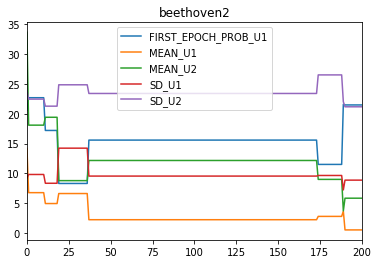

In [66]:
fig = plt.Figure()

mcsum.plot.line(title='beethoven2')

fig.set_size_inches(10,8)
#fig.tight_layout()
fig.get_figure()

#fig.savefig('/Users/carly/Desktop/artifice1_MCMC')

In [67]:
mcsum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 5 columns):
FIRST_EPOCH_PROB_U1    201 non-null float64
MEAN_U1                201 non-null float64
MEAN_U2                201 non-null float64
SD_U1                  201 non-null float64
SD_U2                  201 non-null float64
dtypes: float64(5)
memory usage: 9.4 KB


In [68]:
allchi = mcsum.sum(axis=1)
allchi.idxmin()

190

In [69]:
def kc(dic):
    s1 = dic
    for key, value in s1.items():
        # do something with value
        s1[key] = value
    return s1

In [70]:
#thetakc = pd.DataFrame.from_records(dfc3theta['KC'])

In [71]:
steps = len(mcsum)
x0 = np.arange(0,steps)

In [72]:
theta = mctheta
theta

,alpha,beta,gamma,kb,kc,ks,mu,sigma,tau_a,tau_u
0,0.000124,0.920980,1.036996,0.112483,0.005518,0.214021,1.092512,0.033753,1771.158862,9.466063
1,0.000125,0.951767,1.122495,0.114482,0.005198,0.211957,1.037335,0.031997,1883.956918,8.811159
2,0.000125,0.951767,1.122495,0.114482,0.005198,0.211957,1.037335,0.031997,1883.956918,8.811159
3,0.000125,0.951767,1.122495,0.114482,0.005198,0.211957,1.037335,0.031997,1883.956918,8.811159
4,0.000125,0.951767,1.122495,0.114482,0.005198,0.211957,1.037335,0.031997,1883.956918,8.811159
5,0.000125,0.951767,1.122495,0.114482,0.005198,0.211957,1.037335,0.031997,1883.956918,8.811159
6,0.000125,0.951767,1.122495,0.114482,0.005198,0.211957,1.037335,0.031997,1883.956918,8.811159
7,0.000125,0.951767,1.122495,0.114482,0.005198,0.211957,1.037335,0.031997,1883.956918,8.811159
8,0.000125,0.951767,1.122495,0.114482,0.005198,0.211957,1.037335,0.031997,1883.956918,8.811159
9,0.000125,0.951767,1.122495,0.114482,0.005198,0.211957,1.037335,0.031997,1883.956918,8.811159


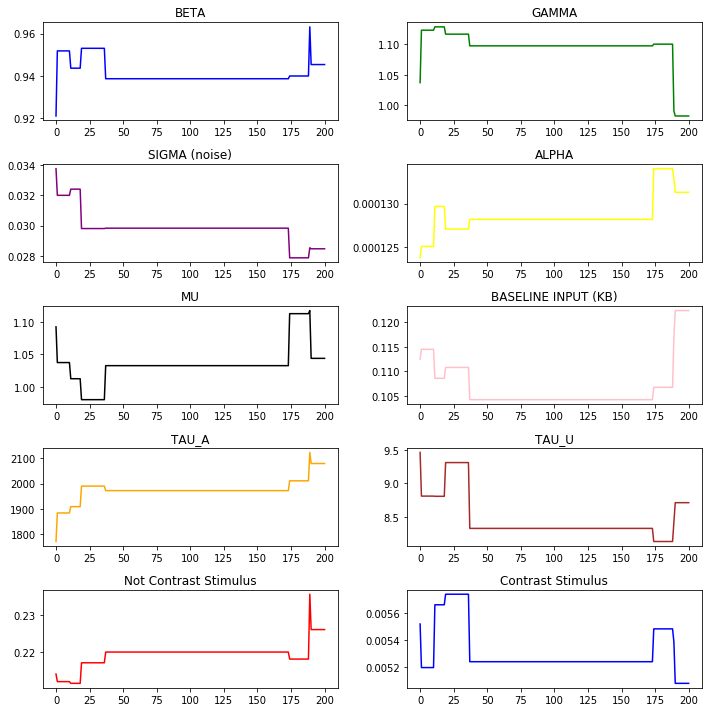

In [73]:
theta = mctheta
fig,ax = plt.subplots(5,2)

ax[0,0].plot(x0,theta['beta'],color='blue',label='BETA')
ax[0,1].plot(x0,theta['gamma'],color='green',label='GAMMA')
ax[1,0].plot(x0,theta['sigma'],color='purple',label='SIGMA')
ax[1,1].plot(x0,theta['alpha'],color='yellow',label='ALPHA')
ax[2,0].plot(x0,theta['mu'],color='black',label='MU')
ax[2,1].plot(x0,theta['kb'],color='pink',label='BASELINE INPUT (KB)')
ax[3,0].plot(x0,theta['tau_a'],color='orange',label='TAU_A')
ax[3,1].plot(x0,theta['tau_u'],color='brown',label='TAU_U')
ax[4,0].plot(x0,theta['ks'],color='red',label='not from contrast')
ax[4,1].plot(x0,theta['kc'],color='blue',label='contrast')


ax[0,0].set_title('BETA')
ax[0,1].set_title('GAMMA')
ax[1,0].set_title('SIGMA (noise)')
ax[1,1].set_title('ALPHA')
ax[2,0].set_title('MU')
ax[2,1].set_title('BASELINE INPUT (KB)')
ax[3,0].set_title('TAU_A')
ax[3,1].set_title('TAU_U')
ax[4,0].set_title('Not Contrast Stimulus')
ax[4,1].set_title('Contrast Stimulus')


fig.get_figure()
fig.set_size_inches(10,10)
fig.tight_layout()
#fig.savefig(savepath+'', dpi=100)

In [74]:
chicol = ['CHI: First Epoch Probability',
          'CHI: U1 Mean Dominance Time',
          'CHI: U2 Mean Dominance Time',
          'CHI: U1 std for CV=0.6',
          'CHI: U2 std for CV=0.6'
         ]

In [75]:
best = allchi.idxmin()

In [76]:
dfbest = pd.DataFrame(mcchi[best])
chiallsave = dfbest.T
chiallsave.columns = chicol
#chiallsave.index.name = 1
chiallsave

,CHI: First Epoch Probability,CHI: U1 Mean Dominance Time,CHI: U2 Mean Dominance Time,CHI: U1 std for CV=0.6,CHI: U2 std for CV=0.6
0,0.722601,0.209235,0.059014,2.788980,2.295793
20,20.411056,0.078840,0.562543,1.585218,2.700603
40,0.338409,0.000752,0.879887,2.289236,4.755730
60,0.000000,0.035998,1.777849,1.902483,5.320591
80,0.000000,0.186920,2.552573,0.295693,6.089245


In [77]:
thetasave = mctheta.iloc[best]
thetasave

alpha       0.000131
beta        0.945313
gamma       0.982786
kb          0.122351
kc          0.005082
ks          0.226118
mu          1.043842
sigma       0.028472
tau_a    2079.509053
tau_u       8.712797
Name: 190, dtype: float64

In [78]:
#thetasave.to_pickle(pathname+'chopin.pkl')
#thetasave.to_pickle(modelpath+'chopin.pkl')

In [79]:
colsum = dfbest.sum(axis=1)
colsum['CHI SUM'] = colsum.sum()
colsum

FIRST_EPOCH_PROB_U1    21.472067
MEAN_U1                 0.511746
MEAN_U2                 5.831866
SD_U1                   8.861609
SD_U2                  21.161962
CHI SUM                57.839250
dtype: float64

In [9]:
x = np.linspace(0, 2 * np.pi, 400)
z = np.linspace(0, 4 * np.pi, 400)
y = np.sin(x ** 2)

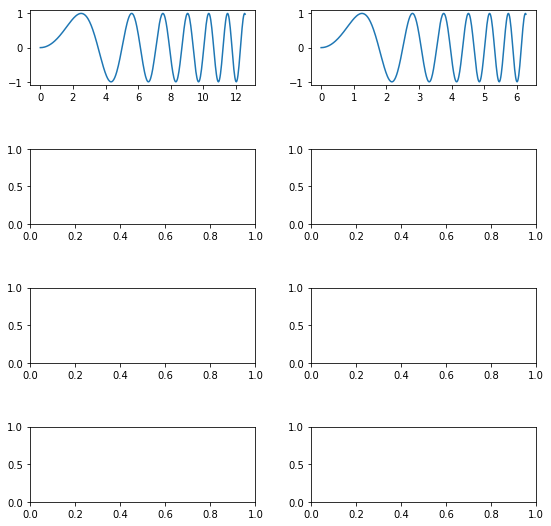

In [39]:
fig, ax = plt.subplots(4,2)
#figsize=(10,14)

ax[0,0].plot(z,y)
ax[0,1].plot(x,y)

fig.get_figure()
fig.tight_layout()
fig.set_size_inches(8,8)